In [1]:
import csv
import pandas as pd
import os

In [2]:
def calculateCosineSimilarity(d1, d2):
    cos_sim = np.dot(d1, d2)/(np.linalg.norm(d1)*np.linalg.norm(d2))
    return cos_sim

In [3]:
fin='language.csv'
dataset=[]
upd_dataset=[]
cnt=0
with open(fin,errors='ignore') as file:
    reader = csv.reader(file)
    data = list(reader)
#     print(data)
#     dataset.append(data)
#     cnt+=1
#     if cnt>=1:
#         break
# #     dataset.append(data)
    
print(len(data))

wals_lan=['ben','hin','tel','tml','guj','mhi','pan','mym','knd']
lan_dict=dict()
for row in data:
    wals_code=row[0]
    if wals_code in wals_lan:
        cur_features=list()
        for i in range(10,len(row)):
            l=row[i].split()
            if len(l)>1:
                cur_features.append(int(l[0]))
            else:
                cur_features.append(int(0))


                
        lan_dict[wals_code]=cur_features
             
print(lan_dict)            


2681
{'ben': [4, 3, 3, 2, 2, 1, 1, 2, 0, 0, 1, 3, 1, 2, 8, 1, 5, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 6, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 4, 0, 0, 1, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5], 'guj': [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 3, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 6, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [4]:
def intersect(l1, l2):
    
    
    for i in range(0,len(l1)):
        
        if l1[i]!=0 and l2[i]!=0:
            continue
        else:
            l1[i]=0
            l2[i]=0
    return l1,l2
            

In [5]:
for k in lan_dict:
    for l in lan_dict:
        if k!=l:
            cur_l1=lan_dict[k]
            cur_l2=lan_dict[l]
            new_l1,new_l2=intersect(cur_l1,cur_l2)
            lan_dict[k]=new_l1
            lan_dict[l]=new_l2

print(lan_dict)

{'ben': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 0, 0, 1, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'guj': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [6]:
list1=[1,0,4,0,2,0,9]
list2=[0,3,7,9,1,10,4]
list1,list2=intersect(list1,list2)
print(list1)
print(list2)

[0, 0, 4, 0, 2, 0, 9]
[0, 0, 7, 0, 1, 0, 4]


In [7]:
for k in lan_dict:
    cur_l=lan_dict[k]
    count=0
    for val in cur_l:
        if val!=0:
            count+=1
            
    print(count)

14
14
14
14
14
14
14
14
14


In [8]:
def removeZeroes(l):
    new_l=list()
    
    for i in l:
        if i!=0:
            new_l.append(i)
    return new_l

In [9]:
for k in lan_dict:
    lan_dict[k]=removeZeroes(lan_dict[k])
    
print(lan_dict)

{'ben': [1, 1, 1, 1, 1, 4, 1, 8, 8, 4, 2, 4, 4, 4], 'guj': [1, 1, 1, 1, 4, 4, 11, 7, 1, 1, 1, 4, 3, 4], 'hin': [1, 1, 1, 1, 4, 4, 11, 7, 1, 1, 1, 4, 3, 4], 'knd': [1, 1, 1, 1, 2, 4, 2, 20, 8, 4, 4, 4, 6, 4], 'mhi': [1, 1, 1, 1, 1, 4, 1, 8, 8, 4, 2, 4, 4, 4], 'mym': [1, 1, 1, 1, 2, 4, 2, 20, 8, 4, 4, 4, 6, 4], 'pan': [1, 1, 1, 1, 4, 4, 11, 7, 1, 1, 1, 4, 3, 4], 'tel': [1, 1, 1, 1, 2, 4, 2, 20, 8, 4, 4, 4, 6, 4], 'tml': [1, 1, 1, 1, 2, 4, 2, 20, 8, 4, 4, 4, 6, 4]}


In [10]:
fin='indian_languages.csv'
ind_data=[]
with open(fin,errors='ignore') as file:
    reader = csv.reader(file)
    ind_data=list(reader)

ind_lan_dict=dict()   
for row in ind_data:
    ind_lan_dict[row[3]]=row[0]
print(ind_lan_dict)
    

{'id': 'ascii_name', 'akb': 'akabiada', 'akc': 'akacari', 'akk': 'akakede', 'agm': 'angami', 'ao': 'ao', 'apt': 'apatani', 'apk': 'apucikwar', 'ass': 'assamese', 'awd': 'awadhi', 'bdg': 'badaga', 'bgi': 'bagri', 'blt': 'balti', 'baw': 'bawm', 'ben': 'bengali', 'bkb': 'betta kurumba', 'bhi': 'bhili', 'bho': 'bhojpuri', 'bhu': 'bhumij', 'bod': 'bodo', 'boq': 'bokar', 'boj': 'bori', 'bkt': 'brokskat', 'bgn': 'bugun', 'ghr': 'bunan', 'bya': 'byansi', 'chg': 'chang', 'chd': 'chaudangsi', 'cmr': 'chin mara', 'drm': 'darma', 'deu': 'deuri', 'dig': 'digaro', 'dms': 'dimasa', 'dgi': 'dogri', 'gdk': 'gadaba kondekor', 'gal': 'galo', 'gar': 'garo', 'goj': 'gojri', 'gon': 'gondi', 'gan': 'great andamanese', 'guj': 'gujarati', 'gdb': 'gutob', 'hlb': 'halbi', 'hin': 'hindi', 'hma': 'hmar', 'ho': 'ho', 'idu': 'idu', 'ipi': 'indopakistani sign language indian dialects', 'jad': 'jad', 'jrw': 'jarawa in andamans', 'joh': 'johari', 'jun': 'juang', 'jug': 'jugli', 'kbi': 'kabui', 'kac': 'kachari', 'xns': 

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

dataset=[]
lan_names=[]
lan_codes=[]
for lan in lan_dict:
    lan_codes.append(lan)
    lan_names.append(ind_lan_dict[lan])
    fv=lan_dict[lan]
    dataset.append(fv)

dataset_array=np.array(dataset)

# print(dataset_array)
# scaler = StandardScaler()

# scaler.fit(dataset_array)
# print(scaler.mean_)
# dataset_array=scaler.transform(dataset_array)
# print(dataset_array)



# print(dataset_array)
# scaler = MinMaxScaler()

# scaler.fit(dataset_array)
# print(scaler.data_max_)
# dataset_array=scaler.transform(dataset_array)
# print(dataset_array)


# dataset_array = preprocessing.scale(dataset_array)
# print(dataset_array)
# print('Bengali -Hindi',calculateCosineSimilarity(dataset_array[0],dataset_array[1]))
# print('Bengali-  Telegu',calculateCosineSimilarity(dataset_array[0],dataset_array[2]))
# print('Hindi - Telegu',calculateCosineSimilarity(dataset_array[1],dataset_array[2]))

for i in range(0,len(dataset_array)):
    for j in range(0,len(dataset_array)):
        if i<j:
            print('Cosine similarity between',lan_codes[i],'and',lan_codes[j],'-',round(calculateCosineSimilarity(dataset_array[i],dataset_array[j]),2))
                

Cosine similarity between ben and guj - 0.64
Cosine similarity between ben and hin - 0.64
Cosine similarity between ben and knd - 0.91
Cosine similarity between ben and mhi - 1.0
Cosine similarity between ben and mym - 0.91
Cosine similarity between ben and pan - 0.64
Cosine similarity between ben and tel - 0.91
Cosine similarity between ben and tml - 0.91
Cosine similarity between guj and hin - 1.0
Cosine similarity between guj and knd - 0.67
Cosine similarity between guj and mhi - 0.64
Cosine similarity between guj and mym - 0.67
Cosine similarity between guj and pan - 1.0
Cosine similarity between guj and tel - 0.67
Cosine similarity between guj and tml - 0.67
Cosine similarity between hin and knd - 0.67
Cosine similarity between hin and mhi - 0.64
Cosine similarity between hin and mym - 0.67
Cosine similarity between hin and pan - 1.0
Cosine similarity between hin and tel - 0.67
Cosine similarity between hin and tml - 0.67
Cosine similarity between knd and mhi - 0.91
Cosine similar

In [12]:
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 2)
 
#predict the labels of clusters.
label = kmeans.fit_predict(dataset_array)
print(label)
print(lan_codes)

[0 0 0 1 0 1 0 1 1]
['ben', 'guj', 'hin', 'knd', 'mhi', 'mym', 'pan', 'tel', 'tml']


In [13]:
from sklearn.cluster import AgglomerativeClustering

for i in range(2,8):
    clustering = AgglomerativeClustering(n_clusters= i).fit(dataset_array)
    print(clustering.labels_)


[0 0 0 1 0 1 0 1 1]
[2 1 1 0 2 0 1 0 0]
[2 1 1 0 2 0 1 0 3]
[2 1 1 0 2 0 1 4 3]
[2 0 0 5 2 3 0 4 1]
[2 0 0 5 2 3 6 4 1]


In [14]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

[2 1 1 0 2 0 1 0 0]


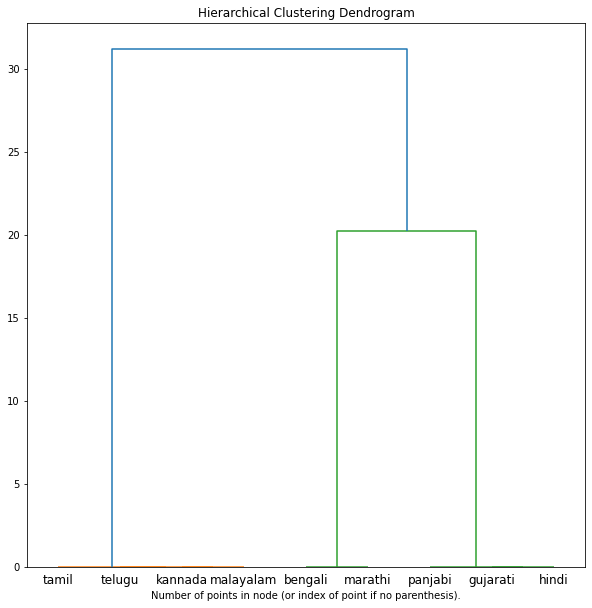

In [17]:
plt.rcParams["figure.figsize"] = (10,10)
model = AgglomerativeClustering(distance_threshold=0.1, n_clusters=None)

model = model.fit(dataset_array)
print(model.labels_)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=4, labels=lan_names)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
#plt.ylim([0,0.000000000000000000000006])
# plt.yticks([-1,0,0.5,1, 5 ,10, 15, 20, 25, 30, 35])
plt.show()

[8 7 6 5 4 3 2 1 0]


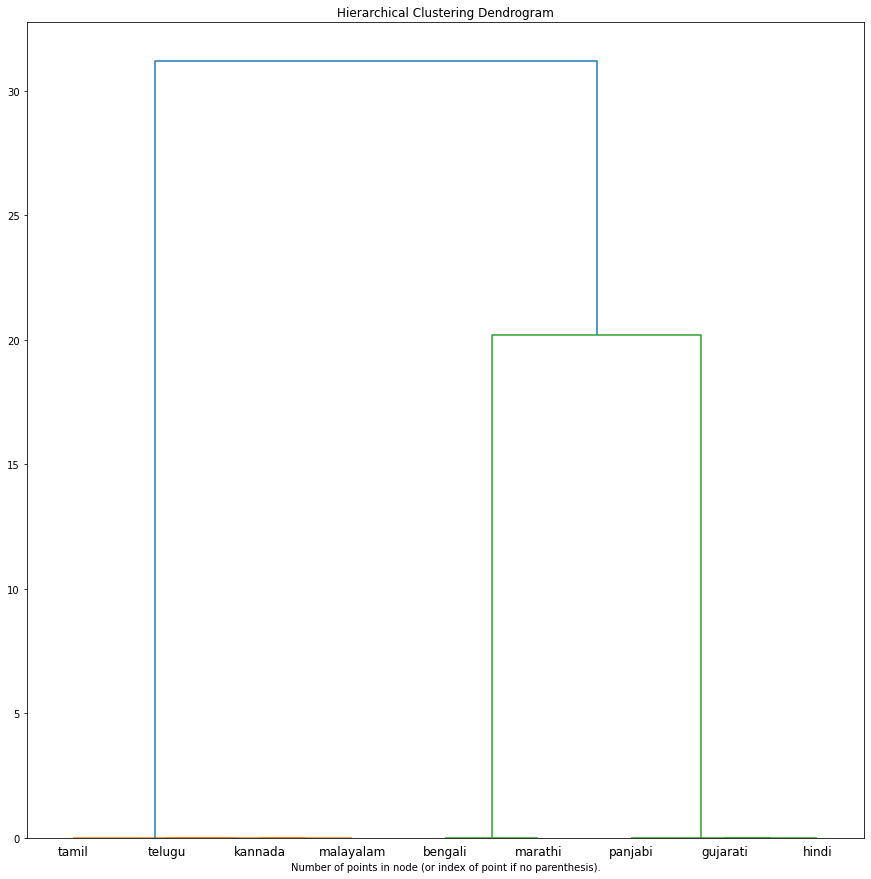

In [16]:
plt.rcParams["figure.figsize"] = (15,15)
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(dataset_array)
print(model.labels_)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=4, labels=lan_names)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()